In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import cv2
import os
import glob
print(os.listdir("../input"))

['facesss', 'pca-faces', 'face-pca', 'face-face']


In [55]:
images_s01 = [cv2.imread(file) for file in glob.glob("../input/face-pca/v*.png")]
images_s02 = [cv2.imread(file) for file in glob.glob("../input/face-pca/r*.png")]
images_s03 = [cv2.imread(file) for file in glob.glob("../input/pca-faces/a*.png")]
images_s06 = [cv2.imread(file) for file in glob.glob("../input/facesss/subject6*.png")]
images_s07 = [cv2.imread(file) for file in glob.glob("../input/facesss/subject7*.png")]
images_s08 = [cv2.imread(file) for file in glob.glob("../input/facesss/subject8*.png")]
images_s09 = [cv2.imread(file) for file in glob.glob("../input/facesss/subject9*.png")]
images_s10 = [cv2.imread(file) for file in glob.glob("../input/face-face/subject2*.png")]
images_s11 = [cv2.imread(file) for file in glob.glob("../input/face-face/subject1*.png")]
print('no of s1 images: '+str(len(images_s02)))

no of s1 images: 11


In [56]:
directory = [images_s01,images_s02,images_s11,images_s10,images_s03,images_s06,images_s07,images_s08,images_s09]

In [57]:
print(directory)
label = [] # making labels for faces
for i in range(len(directory)):
    for j in range(len(images_s01)):
        label.append(i)
print("Done")

[[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255

In [58]:
imgs = []
for w in directory: 
    for x in w:
        x = cv2.cvtColor(x,cv2.COLOR_BGR2GRAY)  #rbg to gray                    
        x = cv2.resize(x,(300,300)) # resize image to 20x20
        imgs.append(x.flatten()) #flatten array
print("Done")

def solve_PCA(X_train, k, cov_t, norm_avg):
    eig_vals, eig_vctrs = np.linalg.eig(cov_t)
    eig_vect_df = pd.DataFrame(data=eig_vctrs)
    i_sorted = np.argsort(eig_vals)[::-1] # arg sort returns the index where corresponding element would b
    i_sorted_k_largest = i_sorted[:k] #::-1 sort from the largest to smallest return index
    eig_vect_df_k = eig_vect_df[i_sorted_k_largest] # k min values k corresponding we selected k vectors
    eig_vect_k = eig_vect_df_k.values # now considered the values of the selected data frames assigned 
    eig = np.dot(norm_avg.T,eig_vect_k)
    projected = np.dot(norm_avg, eig)
    return eig,projected
"""
eigen_values, eigen_vectors = np.linalg.eig(criterion)
eigen_vectors_pd = pd.DataFrame(data=eigen_vectors)
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_indices_m = sorted_indices[:m]
eigen_vectors_pd_m = eigen_vectors_pd[sorted_indices_m]
eigen_vectors_m = eigen_vectors_pd_m.values
fisher_faces = np.dot(X,eigen_vectors_m)
"""
"""
ef PCA(X_train, k):
    eigen_values, eigen_vectors = np.linalg.eig(covariance_t)
    # select best k eigen vectors
    eigen_vectors_pd = pd.DataFrame(data=eigen_vectors)
    sorted_indices = np.argsort(eigen_values)[::-1]
    sorted_indices_k = sorted_indices[:k]
    eigen_vectors_pd_k = eigen_vectors_pd[sorted_indices_k]
    eigen_vectors_k = eigen_vectors_pd_k.values
    eigen_faces = np.dot(mean_normalized.T,eigen_vectors_k)
    projected_faces = np.dot(mean_normalized, eigen_faces)
    return eigen_faces,projected_faces
"""

def solve_LDA(X_train, k, cov_t):
    eig_vals, eig_vctrs = np.linalg.eig(cov_t)
    eig_vect_df = pd.DataFrame(data=eig_vctrs)
    i_sorted = np.argsort(eig_vals)[::-1] # arg sort returns the index where corresponding element would b
    i_sorted_k_largest = i_sorted[:k] #::-1 sort from the largest to smallest return index
    eig_vect_df_k = eig_vect_df[i_sorted_k_largest] # k min values k corresponding we selected k vectors
    eig_vect_k = eig_vect_df_k.values # now considered the values of the selected data frames assigned 
    eig = np.dot(X_train,eig_vect_k)
    return eig, eig_vect_k


def PCA(X_train, k):
    norm_avg = X_train - np.mean(X_train)  
    cov_t = np.cov(norm_avg) # Matrix Covarience
    
    eig,projected = solve_PCA(X_train,k,cov_t,norm_avg)
    return eig,projected
    print("Done")



Done


In [59]:
"""
def PCA(X_train, k):
    norm_avg = X_train - np.mean(X_train)  
    cov_t = np.cov(norm_avg) # Matrix Covarience
    
    
    eig_vals, eig_vctrs = np.linalg.eig(cov_t) #eigen values and eigen fucntions extract
    # select best k eigen vectors
    eig_vect_df = pd.DataFrame(data=eig_vctrs)
    i_sorted = np.argsort(eig_vals)[::-1] # arg sort returns the index where corresponding element would b
    i_sorted_k_largest = i_sorted[:k] #::-1 sort from the largest to smallest return index
    eig_vect_df_k = eig_vect_df[i_sorted_k_largest] # k min values k corresponding we selected k vectors
    eig_vect_k = eig_vect_df_k.values # now considered the values of the selected data frames assigned 
    eig = np.dot(norm_avg.T,eig_vect_k)
    projected = np.dot(norm_avg, eig)
    return eig,projected
"""
print("Done")

Done


In [60]:
h = PCA(imgs, 38) 
projected = h[1]
print(h[1])

[[ 2.03980682e+09 -5.43804557e+08 -3.84030990e+08 ...  7.37851935e+07
   1.00318532e+08 -5.37970393e+07]
 [ 4.73850607e+08 -3.10331930e+08  3.22598791e+08 ... -3.58806688e+07
  -2.39257658e+07  3.86023332e+07]
 [-1.59367754e+08  7.66625792e+07  3.62240128e+08 ...  3.38008413e+07
   1.99778970e+07 -1.23507738e+07]
 ...
 [ 5.02258179e+09 -1.44216707e+08  2.89170585e+08 ...  1.07914608e+06
   9.55279286e+06 -1.73668870e+06]
 [ 1.09232414e+09 -1.35294845e+09  8.59209646e+07 ... -3.76214677e+07
  -6.10462320e+07  2.91246603e+07]
 [ 4.25805450e+09 -1.06139698e+09  2.62184458e+08 ... -3.05402299e+06
   3.73775270e+06 -3.42441068e+06]]


In [61]:
X_train, X_test, Y_train, Y_test = tts(projected, label, test_size = 0.1)
print('Length of train dataset ' + str(len(X_train)) + ', Length of test dataset ' +str(len(X_test)))

Length of train dataset 89, Length of test dataset 10


In [62]:

def LDA(X_train,Y_train,m):
    #seperate by class
    loop_var = set(Y_train) #creation of set
    seperated_X = []
    for i in loop_var:
        single_class_data = []
        for index, j in enumerate(Y_train): # enumerates list everything from 1 to N
            if(i == j):
                single_class_data.append(X_train[index])
        seperated_X.append(np.array(single_class_data))
    tot_cov = np.cov(seperated_X[0].T)
    # calc total covariance
    for index,i in enumerate(seperated_X):
        if(index == 0):
            continue
        tot_cov += np.cov(i.T)
    # calc diff mean
    overall_mean = X_train.mean(0)
    diff_mean = np.atleast_1d(np.square(overall_mean - seperated_X[0].mean(0)))
    for index,i in enumerate(seperated_X):
        if(index == 0):
            continue
        diff_mean += np.square(overall_mean - seperated_X[index].mean(0))
    mean_matrix = np.expand_dims(diff_mean,axis = 1)
    mean_matrix = np.dot(mean_matrix,mean_matrix.T)
    criterion = np.linalg.inv(tot_cov).dot(mean_matrix)
    # select best m component
    """
    eigen_values, eigen_vectors = np.linalg.eig(criterion)
    eigen_vectors_pd = pd.DataFrame(data=eigen_vectors)
    sorted_indices = np.argsort(eigen_values)[::-1]
    sorted_indices_m = sorted_indices[:m]
    eigen_vectors_pd_m = eigen_vectors_pd[sorted_indices_m]
    eigen_vectors_m = eigen_vectors_pd_m.values
    fisher_faces = np.dot(X_train,eigen_vectors_m)
    
    """
    fisher_faces,eigen_vectors_m = solve_LDA(X_train,m,criterion)
    return fisher_faces,eigen_vectors_m



In [63]:
fisherfaces, eigen_vectors = LDA(X_train,Y_train, 40)[0] , LDA(X_train,Y_train, 40)[1] 
print(eigen_vectors.shape)
    

(38, 38)


In [64]:
def predict(X, eig, valss, Y_train):
    temp = np.dot(X.T, eig)
    
    difference = []
    for x in valss:
        print(x.shape)
        print(temp.shape)
        diff = np.linalg.norm(x - temp)
        difference.append(diff)
    var = np.argmin(difference)
    predicted = Y_train[var]
    return predicted
print("Done")

Done


In [65]:
predicted_values = [predict(var_x,  eigen_vectors, fisherfaces, Y_train) for var_x in X_test]
print(eigen_vectors.shape)

(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,

(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,)
(38,

Confusion Matrix AxesSubplot(0.125,0.125;0.62x0.755)


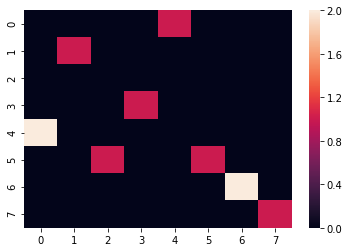

In [66]:

result_confusion = confusion_matrix(Y_test, predicted_values)
ax = sns.heatmap(result_confusion)
print("Confusion Matrix",ax)

In [67]:

ans = accuracy_score(Y_test, predicted_values)*100 
print("Accuracy" , end = " ")
print(str(ans))

Accuracy 60.0
